In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
output_directory = "images"
os.makedirs(output_directory, exist_ok=True)  # Create the directory if it doesn't exist

In [15]:
def waiting_time(data, type, label, name, ax):
    counts = {
        "Less1": [],
        "1to2": [],
        "2to5": [],
        "5to10": [],
        "10to20": [],
        "More20": []
    }
    for k, v in data.items():
        if v < 1:
            counts["Less1"].append(k)
        elif v < 2:
            counts["1to2"].append(k) 
        elif v < 5:
            counts["2to5"].append(k)
        elif v < 10:
            counts["5to10"].append(k)
        elif v < 20:
            counts["10to20"].append(k)
        else:
            counts["More20"].append(k)
    # Define the x-axis labels
    x_labels = ["Less1", "1to2", "2to5", "5to10", "10to20", "More20"]
    labels = ["<1 mins", "1 to 2 mins", "2 to 5 mins", "5 to 10 mins", "10 to 20 mins", ">20 mins"]

    # Get the counts for each category
    y_counts = [len(counts[label]) for label in x_labels]

    # Create the histogram using Seaborn's barplot
    sns.set_style("whitegrid")
    sns.barplot(x=labels, y=y_counts, ax=ax)  # Customize colors

    ax.set_xlabel(f'{label} Ranges (mins)')
    ax.set_ylabel('Count')
    ax.set_title(f'{name}: Bar plot of Waiting {label} Ranges')
    


In [16]:
def floors_occupancy(floors_occupancy, name):
    by_hours = []

    for floor in floors_occupancy:
        hour = []
        for idx, occ in enumerate(floor):
            if idx%12 == 0:
                hour.append(occ)
        by_hours.append(hour)

    end_range = len(by_hours[0])

    hours_list = [f"{hour}:00" for hour in range(6, end_range + 6)]

    df = pd.DataFrame()

    for idx, floor in enumerate(by_hours):
        df[f"Level {idx + 1}"] = floor
        df[f"Level {idx + 1}"] *= 39

    df["time"] = hours_list

    plt.figure(figsize=(10,6))

    sns.set_style("whitegrid")
    ax = df.plot(kind='bar', stacked=True)
    ax.set_xlabel("Time (Hours)")
    ax.set_ylabel("Occupancy")
    ax.set_title(f"{name}: Occupancy by Time and Level")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    output_filename = os.path.join(output_directory, f"{name}-floors occupancy.png")
    plt.savefig(output_filename)

    plt.show()

In [17]:
files = os.listdir()

pkl_files = []
for file in files:
    if file.endswith(".pkl"):
        pkl_files.append(file)

### Waiting Time for Vehicles

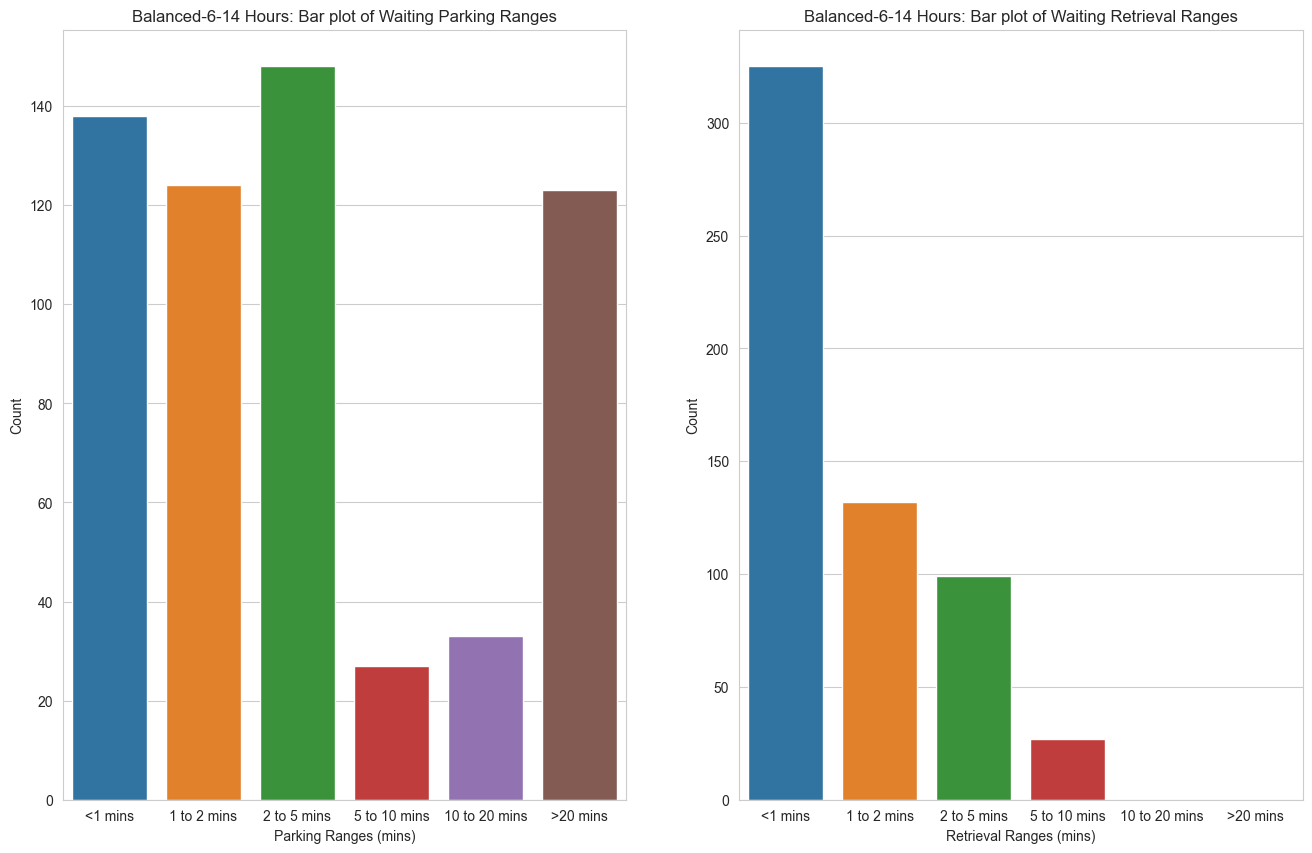

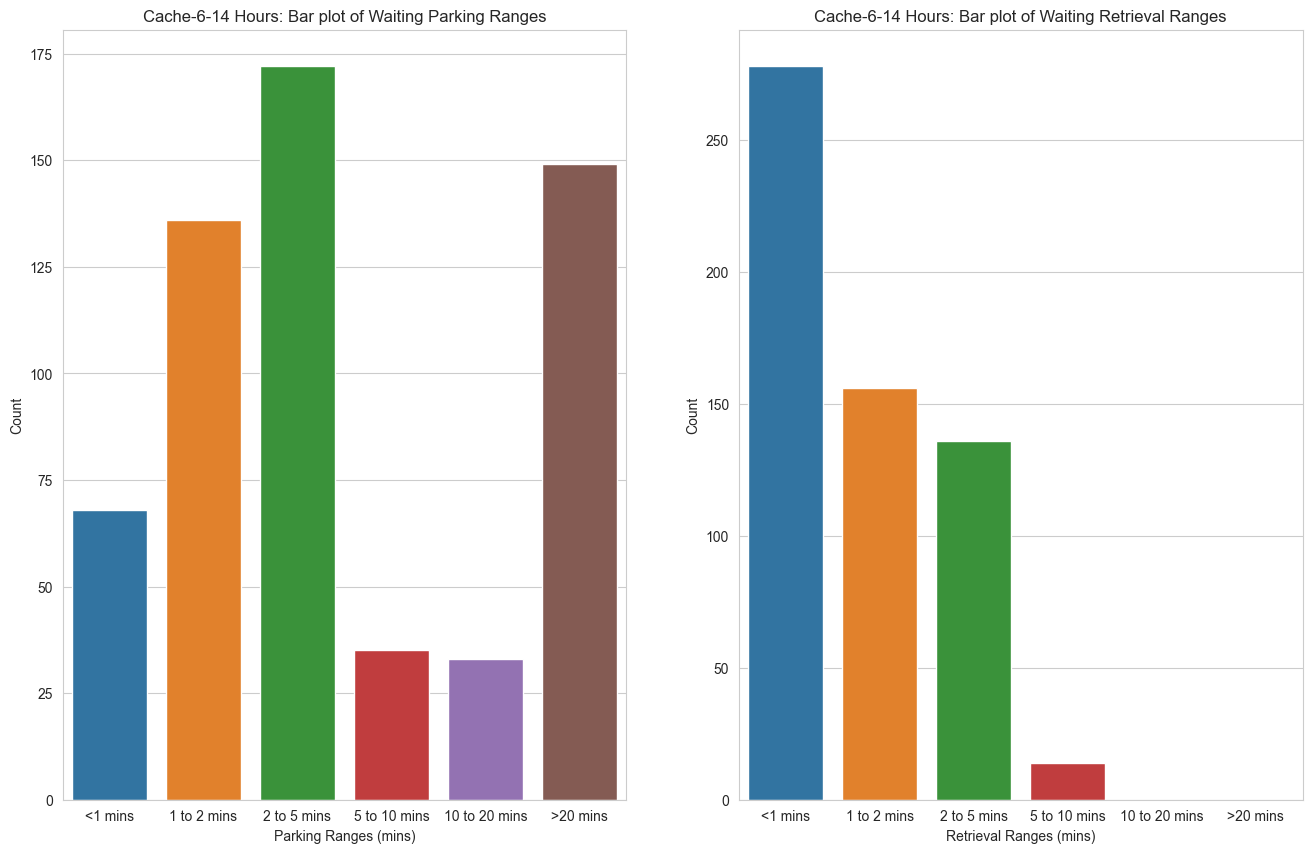

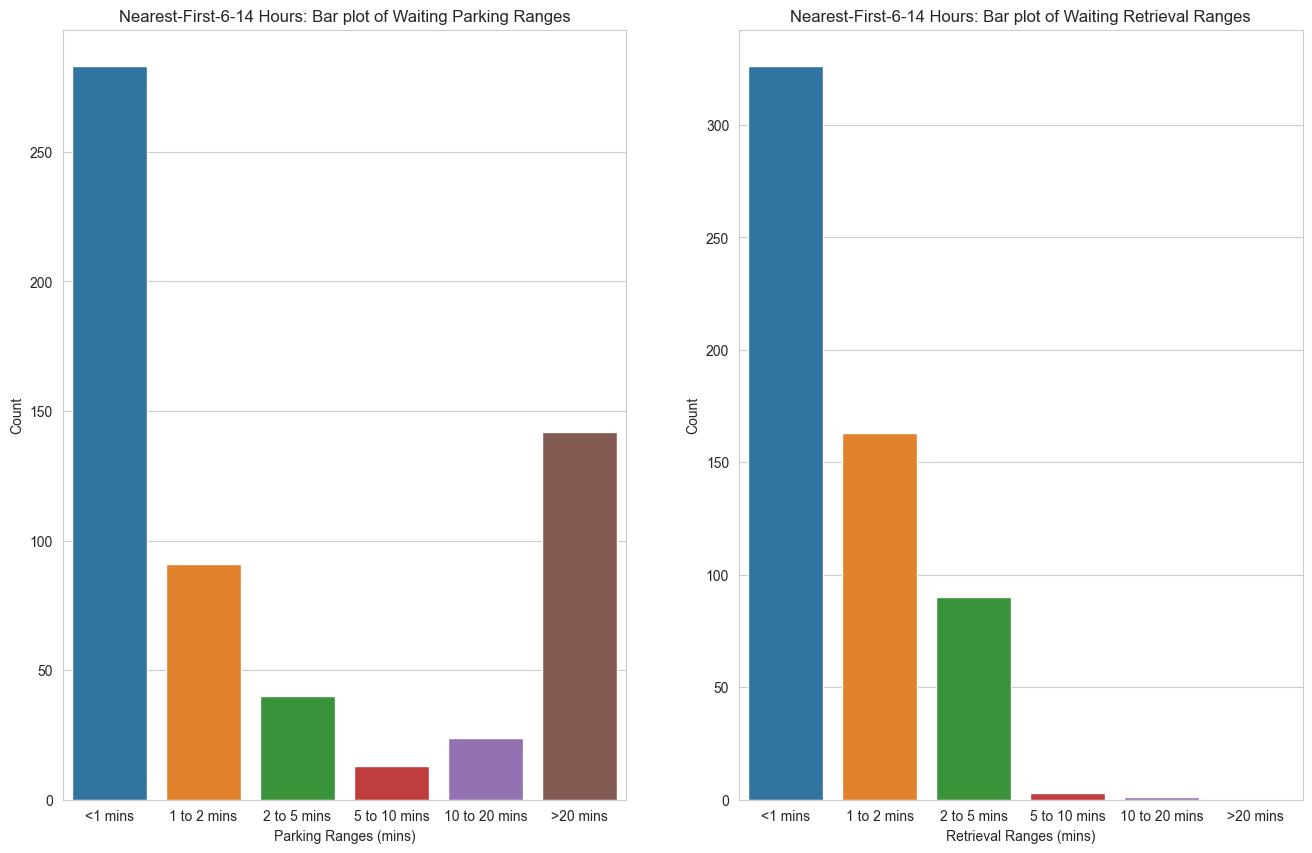

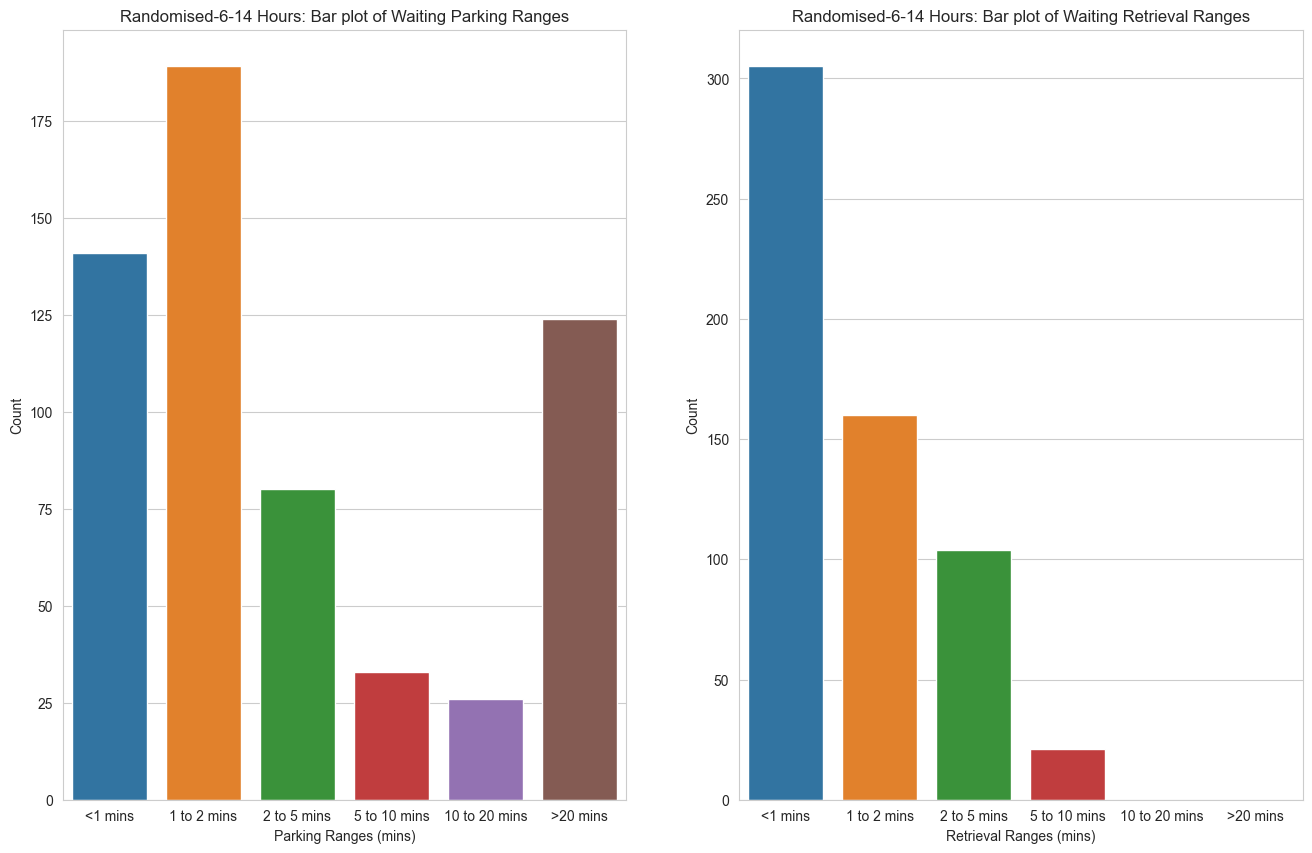

In [18]:
for pkl_file in pkl_files:
    with open(pkl_file, 'rb') as file:
        name = file.name.replace(".pkl", "")
        data_dict=pickle.load(file)
        fig, axes = plt.subplots(1, 2, figsize=(16, 10))
        waiting_time(data_dict["parking"], "parking", "Parking", name, axes[0])
        waiting_time(data_dict["retrieval"], "retrieval", "Retrieval", name, axes[1])

        output_filename = os.path.join(output_directory, f"{name}-waiting_time.png")
        plt.savefig(output_filename)

### Floor Occupancy for each floor

<Figure size 1000x600 with 0 Axes>

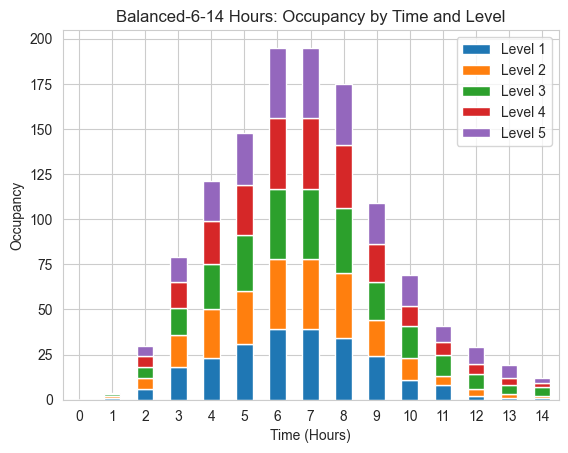

<Figure size 1000x600 with 0 Axes>

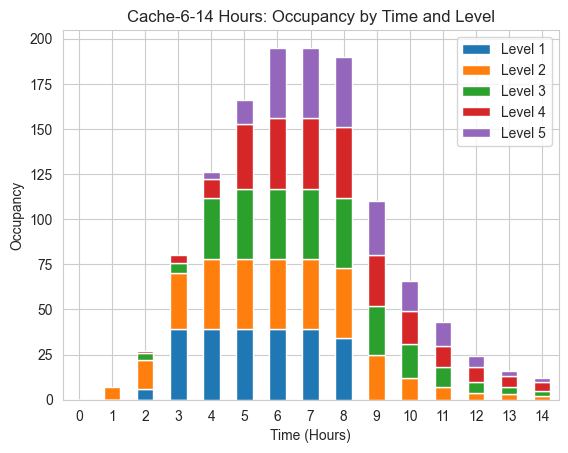

<Figure size 1000x600 with 0 Axes>

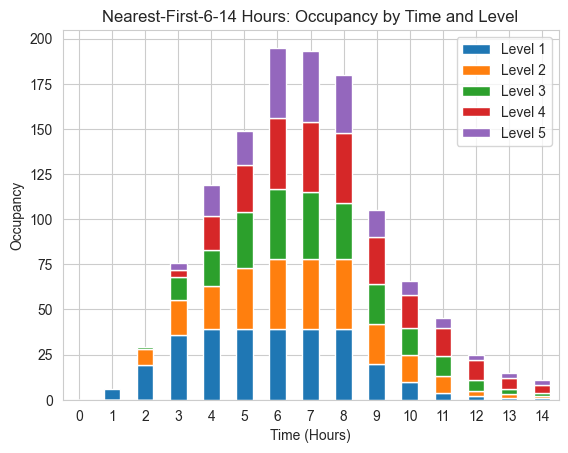

<Figure size 1000x600 with 0 Axes>

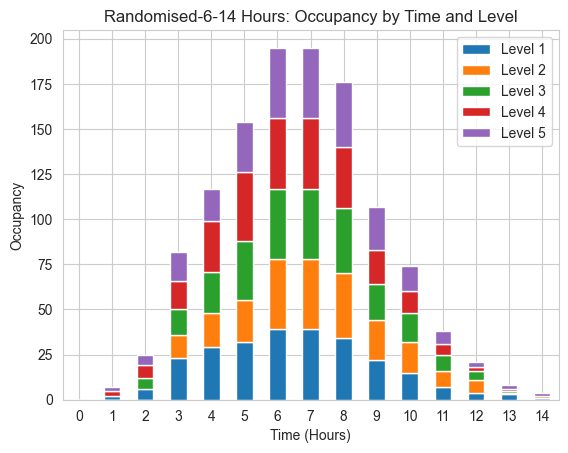

In [51]:
for pkl_file in pkl_files:
    with open(pkl_file, 'rb') as file:
        name = file.name.replace(".pkl", "")
        data_dict=pickle.load(file)
        floors_occupancy(data_dict["floors_occupancy"], name)